Training set metrics:
Accuracy: 0.96
Precision: 1.0
Recall: 0.32
Test set metrics:
Accuracy: 0.9436619718309859
Precision: 1.0
Recall: 0.1111111111111111
Feature: active_site, Score: 0.00000
Feature: metal_binding_site, Score: -0.00101
Feature: binding_site, Score: 0.00637
Feature: site, Score: 0.00489
Feature: dna_binding_site, Score: 0.10830
Feature: nucleotide_phosphate_binding, Score: 0.00014
Feature: zinc_finger, Score: 0.00518
Feature: calcium_binding, Score: -0.00026
Feature: region, Score: 0.15562
Feature: repeat, Score: 0.00643
Feature: coiled_coil, Score: 0.00375
Feature: motif, Score: 0.05729
Feature: domain, Score: 0.04371
Feature: topological_domain, Score: 0.04750
Feature: transmembrane, Score: 0.03379
Feature: intramembrane, Score: 0.00000
Feature: peptide, Score: -0.00081
Feature: propeptide, Score: -0.00017
Feature: transit_peptide, Score: 0.00000
Feature: signal_peptide, Score: -0.00163
Feature: modified_residues, Score: 0.23587
Feature: lipidation, Score: -0.00088
Fe

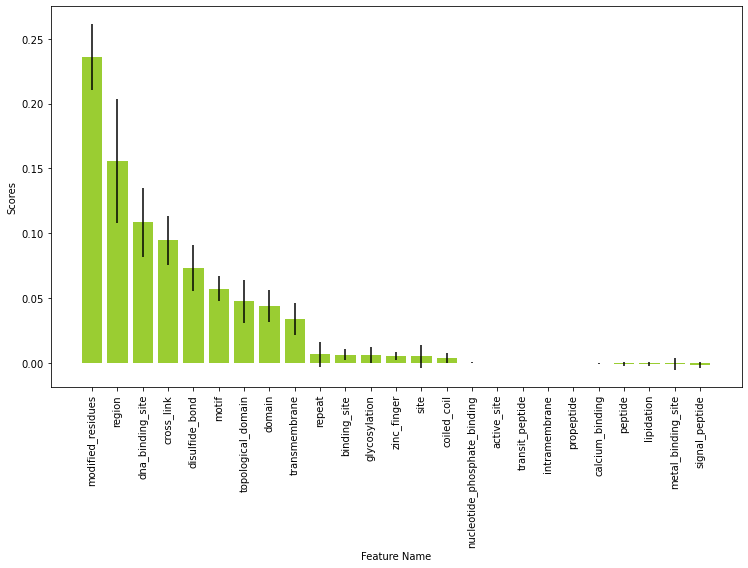

In [9]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import csv
from sklearn.model_selection import train_test_split

data = open('constrained_vs_non_constrained_IDRs_modified_for_excel.txt').readlines()[1:]

feature_names = ['active_site','metal_binding_site','binding_site','site','dna_binding_site','nucleotide_phosphate_binding','zinc_finger','calcium_binding','region','repeat','coiled_coil','motif','domain','topological_domain','transmembrane','intramembrane','peptide','propeptide','transit_peptide','signal_peptide','modified_residues','lipidation','glycosylation','disulfide_bond','cross_link']\

X = []
y = []

for line in data:
    line = line[:-1].split('\t')
    if line[-1] == 'constrained':
        y.append(1)
    else:
        y.append(0)

    X.append(line[42-25-1:42-1])
    for i in range(len(X[-1])):
        X[-1][i] = int(X[-1][i])

X = np.array(X)
y = np.array(y)

# define the model
model = RandomForestClassifier(criterion = "gini")
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model.fit(X_train, y_train)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, model.predict(X_train)))
print('Precision:', precision_score(y_train, model.predict(X_train)))
print()
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))
print('Precision:', precision_score(y_test, model.predict(X_test)))
print()

# get importance
results = permutation_importance(model, X, y, scoring='average_precision', n_repeats = 10)
importance = results.importances_mean
#print(importance)
indices = np.argsort(importance)[::-1]
#print(indices)
std = results.importances_std
#print(std)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i],v))

# plot feature importance
pyplot.bar([feature_names[x] for x in indices], importance[indices],color="yellowgreen", yerr=std[indices], align="center")
pyplot.xticks(rotation=90)
pyplot.ylabel('Scores')
pyplot.xlabel('Feature Name')
fig = pyplot.gcf()
fig.set_size_inches(10.5, 8)
fig.tight_layout()
pyplot.show()
#fig.savefig('count_perm_gini_avg_precision.png', dpi=300)
